# Einfaches Beispiel einer linearen Regression

Ziel: Funktion finden, die Eigenschaften einer Menge an Datenpunkten ausreichend gut abbildet
- **eingehende Variablen (Prädikatoren)**: unabbhängig, können kontinuierlich, diskret oder auch kategorisch sein
- **ausgehende Variablen (Kriterien)**: abhängig, in der Regel kontinuierlich und unbeschränkt
  
  -> unterstellt ist, dass ein **linearer Zusammenhang** besteht

wofür braucht man lineare Regression?
- um zu beantworten wie eingehende Variablen ein Phänomen beeinflussen
- um eine Reaktion eines neuen Sets an Daten vorhersagen zu können


**Zusammenhang der Variablen:**
$\ x = (x_1, ..., x_r);\;$ mit Prädikator $r$

$y = ax_i + b + e;\;$ $a$ ist der Regressionskoeffizient, $b$ der y-Achsenabschnitt, $e$ der Zufallsfehler


$y_i = ax + b;\;$ geschätzte Reaktion, sollte möglichst nah an der tatsächlichen Reaktion $y_i$ sein (für jede Beobachtung $i = 1, ..., n)$

$e_i = y_i - \bar{y}_i;\;$ Residuen (-> **sind möglichst zu minimieren!**)

-> **Zielfunktion der linearen Regression mit der Methode der kleinsten Quadrate**

**Quadratsumme der Residuen/Sum of Squares Regression:**

$SSR = \sum_{i=1}^n e_i^2 = \sum_{i=1} ^n (y_i - \bar{y}_i)^2;\;$ Summe der quadrierten Residuen

-> Quadrate sind notwendig, damit die Vorzeichen der Residuen keine Rolle spielen

Einsetzen der Geradengleichung der geschätzten Reaktion:
$SSR = \sum_{i=1}^n (y_i - (ax_i + b))^2$

Vereinfachen:

$SSR = \sum_{i=1}^n(y_i^2 - 2y_i(ax_i + b) + (ax +b)^2)$ # 2. Binomische Formel

$= (y_i^2 - 2ax_iy_i - 2by_i + a^2x_i^2 + 2abxi + b^2)$ # 1. Binomische Formel

Ableiten der Funktion nach a und b:
[Rechenweg siehe Ziegenhagen 2013, S. 3-5]

$a = \frac{Cov(x, y)}{Var(x)} = \frac{\frac{1}{n} \sum_{i=1}^n(x_i - \bar{x})(y_i - \bar{y})} {\frac{1}{n} \sum_{i=1}^n (x_i - \bar{x})^2};\;$ mit $\bar{x}$ und $\bar{y}$ als Mittelwerte der jeweiligen Datenmengen.

$b = \bar{y} - ax$

**totale Quadratsumme/Sum of Squares Total**: Summe der quadrierten Differenz zwischen den einzelnen Datenpunkten $y_i$ und dem Mittelwert der geschätzten Werte $\bar{y}$.

$SST = \sum_{i=1}^n(y_i – \bar{y})^2$

Aus SSR und SST lässt sich das Bestimmtheitsmaß der Funtktion R berechnen:

$R = 1 - \frac{SSR}{SST}$

**Mean Square Error MSE**:

Die Differenz der tatsächlichen Werte $y_i$ zu den geschätzten Werte $\bar{y}_i$ werden mit der **Kostenfunktion** angegeben:

$ J(a, b) = MSE = \frac{1}{n} \sum_{i=1}^n (y_i - \bar{y}_i)^2;\;$ mit $n$ als Zahl der Daten

-> entspricht dem Fehler pro Datenpunkt, also SST/Anzahl der Daten

Achten auf:
- **underfitting**: Verhältnis der Daten wird mit der geschätzten Reaktion nicht angemessen abgebildet; zeigt sich in einem niedrigen R-Wert und schlechter Generalisierungsfähigkeit bei neuen Daten
- **overfitting**: geschätzte Funktion lernt neben guter Generalisierung auch zufällige Schwankungen der Testdaten; zeigt sich in einem hohen R-Wert der Modellierungs-, und einem niedrigen R-Wert der Testdaten


1. Import Packages

In [1]:
import pandas as pd
import numpy as np
import math
import operator
import matplotlib.pyplot as plt
%matplotlib inline

2. Import Datei als Dataframe

Datensatz: https://www.kaggle.com/datasets/shubham47/students-score-dataset-linear-regression

In [3]:
data = pd.read_csv('student_scores.csv') # Datei dazu bei coLab zu Datein hinzufügen
print(data.head())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30


3. Speichern der Werte als X und Y, Berechnung der Mittelwerte für 'a' und 'b'

In [4]:
X = data['Hours'].values
Y = data['Scores'].values

mean_x = np.mean(X)
mean_y = np.mean(Y)

4. Regressionskoeffizient a und Y-Achsenabschnitt b berechnen

In [7]:
# Gesamtzahl der Input-Daten
a = len(X)

# Berechnung von Varianz und Covarianz
cov = 0
var = 0
for i in range(a):
  cov += (X[i] - mean_x) * (Y[i] - mean_y)
  var += (X[i] - mean_x) ** 2

# Berechnung a und b
a = cov / var
b = mean_y - (a * mean_x)

print (f'a = {round(a,2)} \nb = {round(b,2)}')

a = 9.78 
b = 2.48



5. Inputdaten und Regressionslinie Plotten

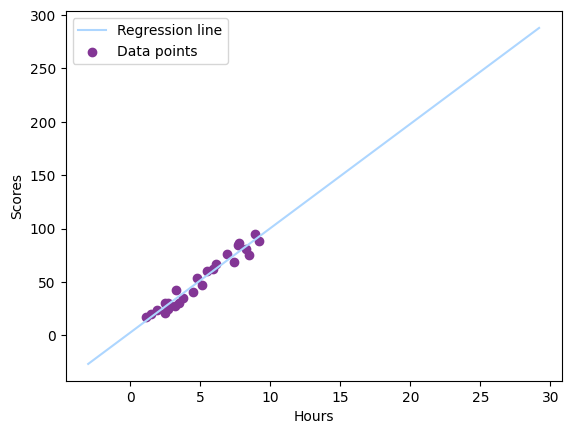

In [9]:
max_x = np.max(X) + 20 # Einstellungen zur Skalierung des Diagramms
min_x = np.min(Y) - 20

x = np.linspace (min_x, max_x, 100)
y = a * x + b

plt.plot(x, y, color='#add6ff', label='Regression line')
plt.scatter(X, Y, c='#833695', label='Data points')

plt.xlabel('Hours')
plt.ylabel('Scores')
plt.legend()
plt.show()

6. R-Quadratwert berechnen um die Güte der Funktion zu bestimmen

In [12]:
ss_t = 0 # Totale Quadratsumme
ss_r = 0 # Summe der quadrierten Residuen

val_count = len(X) # val_count gibt die Gesamtzahl der Datenpunkte an
for i in range(int(val_count)):
  y_pred = a * X[i] + b
  ss_t += (Y[i] - mean_y) ** 2
  ss_r += (Y[i] - y_pred) ** 2
r2 = 1 - (ss_r/ss_t)

print(f'R_squared = {round(r2,2)}')

R_squared = 0.95


**Interpretation**: Mit einem R-Quadratwert von 0,95 können 95% der Varianz der abhängigen Variable durch die abhängige erklärt werden. Damit bietet die Funktion eine hohe Anpassung an die Daten.

Quellen:
- grundsätzlicher Aufbau: Sindhu Seelam(2021). Linear Regression From Scratch in Python WITHOUT Scikit-learn, URL: https://medium.com/geekculture/linear-regression-from-scratch-in-python-without-scikit-learn-a06efe5dedb6
- mathematische Grundlagen: Marcus Kunter (2018). Regression I [Video], URL: https://www.youtube.com/watch?v=osPwkFkYvNc
- Ausführung zur Herleitung der Parametergleichungen: Uwe Ziegenhagen (2013). Herleitung der Parameter-Gleichungen für die einfache lineare Regression, URL: https://www.uweziegenhagen.de/teaching/stat/linreg.pdf
- Überlegungen zu Overfitting und Underfitting: Mirko Stojiljković (2022). Linear Regression in Python, URL: https://realpython.com/linear-regression-in-python/#underfitting-and-overfitting
